# Data cleaning

##  Imports

In [90]:
%load_ext autoreload
%autoreload 2

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Pandas and numpy for data manipulation
%matplotlib inline
import pandas as pd
import numpy as np

# Matplotlib  for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
sns.set(font_scale = 1.5)
sns.set_style('ticks')
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##  Load original data

In [91]:
df = pd.read_csv('../raw_data/NCDB_1999_to_2017.csv')
%time

CPU times: user 10 µs, sys: 14 µs, total: 24 µs
Wall time: 53.2 µs


In [92]:
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1,1,20,2,02,34,UU,1,5,...,06,1990,01,M,41,11,1,UU,1,752
1,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,01,M,19,11,1,UU,1,752
2,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,02,F,20,13,2,02,2,752
3,1999,1,1,08,2,01,01,UU,5,3,...,01,1986,01,M,46,11,1,UU,1,753
4,1999,1,1,08,2,01,01,UU,5,3,...,NN,NNNN,01,M,05,99,2,UU,3,753


Please note that in each attribute the values with U, UU, UUU, UUUU represent Unknown. X, XX, XXX, XXXX represent Jurisdiction does not provide this data element. Q, QQ, QQQ, QQQQ represent Choice is other than the preceding values.  N, NN, NNN, NNNN represent Data element is not applicable. Please see the explanatory docx file in the Data folder for a full explanation of the attributes and their values.

In [4]:
# Rename the class variable
df = df.rename(columns ={'C_SEV':'FATAL'})

In [5]:
# Data size
df.shape

(6772563, 23)

In [6]:
# Drop duplicate rows
df = df.drop_duplicates() 

In [7]:
# Data size after removing duplicate rows
df.shape

(6771768, 23)

In [9]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6771768 entries, 0 to 6772562
Data columns (total 23 columns):
C_YEAR    int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
FATAL     int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE    int64
dtypes: int64(3), object(20)
memory usage: 1.2+ GB


- There are only 3 numerical attributes out of 23 attributes.

The data show no missing values because some of the attributes contain inconsistent formats like U, X, N, and Q as stated above. 

In [10]:
# Replace letters with numpy nan
letter_list = ['U', 'UU', 'UUU', 'UUUU', 'Q', 'QQ', 'QQQ', 'QQQQ', 
               'N', 'NN', 'NNN', 'NNNN', 'X', 'XX', 'XXX', 'XXXX']
df = df.replace(letter_list, np.nan)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6771768 entries, 0 to 6772562
Data columns (total 23 columns):
C_YEAR    int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
FATAL     int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE    int64
dtypes: int64(3), object(20)
memory usage: 1.2+ GB


In [12]:
# Percentage of missing values
missing_values = (df.isnull().sum()/df.shape[0])*100

# Create a dataframe of missing values
Missing_df =pd.DataFrame({'Variable': missing_values.index, 
                          'Percentage of missing values': missing_values.values})
Missing_df.sort_values(by = 'Percentage of missing values', ascending = False)

,Variable,Percentage of missing values
20,P_SAFE,21.184630
7,C_RCFG,10.663892
14,V_YEAR,9.889500
6,C_CONF,8.005487
10,C_RALN,7.525612
17,P_AGE,6.751738
19,P_ISEV,6.403822
11,C_TRAF,5.312719
13,V_TYPE,4.892061
16,P_SEX,4.481134


- Indeed, there are lots of missing values in the attributes.

- P_SAFE has the largest percentage of missing values followed by C_RCFG

- There are no missing values in C_YEAR,  C_CASE, and FATAL (class variable), 

##  Convert variables to the correct format

Based on the data information, there are many categorical variables encoded as numbers. We will now convert them  to the correct description to better understand the data

### Day of week

In [13]:
df.C_WDAY.unique()

array([1, 2, 3, 4, 5, 6, 7, '7', nan, '1', '2', '3', '4', '5', '6'],
      dtype=object)

In [14]:
week_dict = {'1': 'Monday','2': 'Tuesday','3':'Wednesday','4':'Thursday',
             '5':'Friday', '6': 'Saturday', '7':'Sunday',1: 'Monday',2: 'Tuesday',3:'Wednesday',
             4:'Thursday',5:'Friday', 6: 'Saturday', 7:'Sunday'} 

In [15]:
df['C_WDAY'] = df['C_WDAY'].replace(week_dict) 

In [16]:
df.C_WDAY.value_counts()

Friday       1153278
Thursday     1009002
Saturday      992996
Wednesday     957128
Tuesday       947852
Monday        898779
Sunday        811369
Name: C_WDAY, dtype: int64

### Month of the year

In [17]:
df.C_MNTH.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '12', nan, '01', '02', '11'],
      dtype=object)

In [18]:
month_dict = {1: 'January', '01': 'January', 2: 'February','02': 'February',3: 'March', 4: 'April',
             5:'May', 6: 'June', 7: 'July',8: 'August', 9: 'September',10: 'october', 11: 'November',
              '11': 'November', 12: 'December', '12': 'December'}

In [19]:
df['C_MNTH'] = df['C_MNTH'].replace(month_dict)

In [20]:
df.C_MNTH.value_counts()

August       630095
July         622005
December     607222
June         600280
october      596261
September    593249
November     578431
January      575819
May          541550
February     492663
March        481073
April        452695
Name: C_MNTH, dtype: int64

- Also the months are encoded as integers  ranging from 1 to 12

### Collision hour

In [21]:
df.C_HOUR.unique()

array(['20', '08', '17', '15', '14', '01', '11', '13', '19', '16', '09',
       '02', '18', '12', '10', '23', '00', '06', '07', '21', nan, '05',
       '22', '03', '04'], dtype=object)

We will convert hour to numeric

In [22]:
df['C_HOUR'] = pd.to_numeric(df['C_HOUR'], errors = 'coerce')

In [23]:
df.C_HOUR.dtypes

dtype('float64')

### Number of vehicles involved in collision

In [24]:
df.C_VEHS.unique()

array(['02', '01', '03', '04', '06', '07', '09', nan, '05', '13', '08',
       '12', '14', '10', '11', '16', 1, 2, 3, 4, 5, 6, 8, 7, 12, 10, '26',
       '71', 19, 25, 9, '21', '27', '15', '35', 15, 13, 26, '22', '41',
       27, 46, 31, 11, '18', 18, 56, '23', 36, 17, 14, 20, 21, '19', 16,
       '29', '25', 77, 28, 38, '38', '17', '32', 35, 22, 33, '54', 72,
       '40', 44, 58, '30', '77', '20', '24', '34', 24, 39, '51', 57, 43,
       37, 47], dtype=object)

The number of vehicles involved in an accident contains inconsistent numbering, e.g '01', '02', and so on. We  will correct this typos and convert the attribute to numeric

In [25]:
df['C_VEHS'] = df['C_VEHS'].replace(['01','02','03','04','05','06','07','08','09'],
                                   [1,2,3,4,5,6,7,8,9])

In [26]:
df['C_VEHS'] = pd.to_numeric(df['C_VEHS'],errors = 'coerce')

In [27]:
df.C_VEHS.dtypes

dtype('float64')

### Collision configuration

In [28]:
df.C_CONF.unique()

array(['34', '01', nan, '04', '31', '21', '23', '03', '02', '33', '24',
       '35', '41', '06', '32', '36', '05', '22', '25'], dtype=object)

In [29]:
coll_dict = {'01': 'Hit a moving object', '02': 'Hit a stationary object', '03': 'Ran off left shoulder',
                 '04': 'Ran off right shoulder', '05': 'Rollover on roadway', '06': 'Any other single-vehicle ',
                 '34': 'Right turn', '31': 'Head-on collision', '21': 'Rear-end collision', 
                  '23': 'left turn conflict', '33': 'Left turn across opposing traffic',
                 '24': 'right turn conflict', '35': 'Right angle collision', '41': 'Hit a parked motor vehicle',
                 '32': 'Approaching side-swipe', 
                  '36': 'Any other two-vehicle - different direction', '22': 'Side swipe', 
                  '25': 'Any other two-vehicle - same direction'}

In [30]:
df['C_CONF'] = df['C_CONF'].replace(coll_dict)

In [31]:
df.C_CONF.value_counts()

Rear-end collision                             2048187
Right angle collision                           994356
Any other single-vehicle                        596787
Any other two-vehicle - different direction     513153
Left turn across opposing traffic               487981
Ran off right shoulder                          245421
Side swipe                                      226414
Hit a stationary object                         221779
Head-on collision                               221672
Ran off left shoulder                           187179
Hit a moving object                             100895
Hit a parked motor vehicle                       92825
left turn conflict                               79584
Right turn                                       67118
right turn conflict                              60437
Approaching side-swipe                           56616
Rollover on roadway                              15335
Any other two-vehicle - same direction           13916
Name: C_CO

### Roadway configuration

In [32]:
df.C_RCFG.unique()

array([nan, '01', '02', '03', '05', '04', '06', '08', '07', '09', '10'],
      dtype=object)

In [33]:
roadway_dict = {'01': 'Non-intersection', '02':'At an intersection', 
                '03': 'Intersection with parking lot entrance', '04': 'Railroad level crossing',
               '05': 'Bridge, overpass, viaduct', '06': 'Tunnel or underpass', '07': 'Passing or climbing lane',
               '08': 'Ramp', '09': 'Traffic circle', '10': 'Express lane of a freeway system'}

In [34]:
df['C_RCFG'] = df['C_RCFG'].replace(roadway_dict)

In [35]:
df.C_RCFG.value_counts()

At an intersection                        3164171
Non-intersection                          2450279
Intersection with parking lot entrance     323644
Bridge, overpass, viaduct                   59406
Railroad level crossing                     26325
Ramp                                        14372
Tunnel or underpass                          7019
Traffic circle                               2661
Passing or climbing lane                     1123
Express lane of a freeway system              634
Name: C_RCFG, dtype: int64

### Weather condition

In [36]:
df.C_WTHR.unique()

array(['1', '5', '3', '4', '7', '2', nan, '6'], dtype=object)

In [37]:
wthr_dict = {'1': 'Clear and sunny', '2': 'Overcast, cloudy but no precipitation', '3': 'Raining',
            '4': 'Snowing', '5': 'Freezing rain, sleet, hail', '6': 'Visibility limitation', '7': 'Strong wind'}

In [38]:
df['C_WTHR'] = df['C_WTHR'].map(wthr_dict)

In [39]:
df.C_WTHR.value_counts()

Clear and sunny                          4733176
Overcast, cloudy but no precipitation     685980
Raining                                   682240
Snowing                                   406046
Visibility limitation                      95945
Freezing rain, sleet, hail                 34849
Strong wind                                17809
Name: C_WTHR, dtype: int64

### Road surface

In [40]:
df.C_RSUR.unique()

array(['5', '3', '2', '4', '1', '6', nan, '7', '9', '8'], dtype=object)

In [41]:
roadsur_dict = {'1':'Dry, normal', '2': 'Wet', '3': 'Snow', '4':'Slush', '5': 'Icy', '6':'Sand/gravel/dirt',
               '7':'Muddy', '8': 'Oil', '9': 'Flooded'}

In [42]:
df['C_RSUR'] = df['C_RSUR'].map(roadsur_dict)

In [43]:
df.C_RSUR.value_counts()

Dry, normal         4472490
Wet                 1230478
Icy                  371459
Snow                 296579
Slush                 84905
Sand/gravel/dirt      29044
Muddy                  6623
Oil                    1372
Flooded                 432
Name: C_RSUR, dtype: int64

### Road alignment

In [44]:
df.C_RALN.unique()

array(['3', '6', '1', nan, '2', '5', '4'], dtype=object)

In [45]:
roadall_dist = {'1':'Straight and level', '2':'Straight with gradient', '3': 'Curved and level',
               '4':'Curved with gradient', '5': 'Top of hill or gradient', '6': 'Bottom of hill or gradient'}

In [46]:
df['C_RALN']= df['C_RALN'].replace(roadall_dist)

In [47]:
df.C_RALN.value_counts()

Straight and level            4846725
Straight with gradient         663241
Curved and level               415574
Curved with gradient           252579
Top of hill or gradient         48383
Bottom of hill or gradient      35649
Name: C_RALN, dtype: int64

### Traffic control

In [48]:
df.C_TRAF.unique()

array(['03', '18', '01', nan, '06', '10', '05', '04', '11', '07', '08',
       '16', '17', '02', '13', '15', '09', '12'], dtype=object)

In [49]:
tracon_dict ={'01': 'Traffic signals fully operational', '02': 'Traffic signals in flashing mode',
             '03': 'Stop sign', '04': 'Yield sign', '05':'Warning sign', '06':'Pedestrian crosswalk',
             '07': 'Police officer', '08': 'School guard, flagman', '09': 'School crossing',
              '10': 'Reduced speed zone', '11': 'No passing zone sign', '12': 'Markings on the road',
             '13': 'School bus stopped with school bus signal lights flashing',
             '15':'Railway crossing with signals, or signals and gates',
             '16': 'Railway crossing with signs only',
             '17': 'Control device not specified', '18': 'No control present'}
df['C_TRAF'] = df['C_TRAF'].map(tracon_dict)

In [50]:
df.C_TRAF.value_counts()

No control present                                           3517741
Traffic signals fully operational                            1896040
Stop sign                                                     755000
Yield sign                                                    105980
Pedestrian crosswalk                                           52645
School guard, flagman                                          28071
Traffic signals in flashing mode                               22208
School bus stopped with school bus signal lights flashing       4929
Warning sign                                                    4611
Control device not specified                                    4572
Railway crossing with signals, or signals and gates             4451
Markings on the road                                            4389
No passing zone sign                                            3862
Reduced speed zone                                              3160
Police officer                    

### Vehicle sequence number

In [51]:
df.V_ID.unique()

array(['01', '02', '99', '03', '04', nan, '05', '06', '07', '08', '09',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '70', '71', 2, 1, 99, 3, 4, 5, 6, 7,
       8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       '72', '73', '74', '83', '85', '86', '75', '76', '77', 42, 43, 44,
       45, 46, 47, 48, 49, 51, 52, 50, 53, 54, 55, 56, 57], dtype=object)

There is a mismatch in the vehicle sequence number, e.g. '01' is 1, '02' is 2 and so on

In [52]:
df['V_ID'] = df['V_ID'].replace(['01','02','03','04','05','06', '07','08','09'],
                               [1,2,3,4,5,6,7,8,9])

In [53]:
# Convert to numeric
df['V_ID'] = pd.to_numeric(df['V_ID'], errors ='coerce')

### Vehicle type

In [54]:
df.V_TYPE.unique()

array(['06', '01', nan, '11', '20', '17', '07', '08', '09', '22', '14',
       '23', '05', '16', '19', '18', '10', '21'], dtype=object)

In [55]:
vehtype_dict ={'01': 'Light Duty Vehicle', '06': 'Other trucks and vans', '11': 'Urban and Intercity Bus',
              '20': 'Construction equipment', '17': 'Bicycle', '07': 'Unit trucks', '08': 'Road tractor',
              '09': 'School bus', '22': 'Snowmobile', '14': 'Motorcycle and moped', '23': 'Street car',
              '05': 'Panel/cargo van', '16': 'Off road vehicles', 
               '19': 'Farm equipment', '18': 'Purpose-built motorhome',
              '10': 'Smaller school bus', '21': 'Fire engine'}
df['V_TYPE'] = df['V_TYPE'].map(vehtype_dict)

In [56]:
df.V_TYPE.value_counts()

Light Duty Vehicle         5581069
Other trucks and vans       193087
Motorcycle and moped        144140
Bicycle                     141776
Unit trucks                 101481
Road tractor                 81219
Panel/cargo van              75875
Urban and Intercity Bus      59947
School bus                   25546
Off road vehicles            11135
Construction equipment        8807
Snowmobile                    5057
Purpose-built motorhome       3540
Street car                    3451
Farm equipment                2323
Smaller school bus            1087
Fire engine                    949
Name: V_TYPE, dtype: int64

### Vehicle model year

In [57]:
df.V_YEAR.unique()

array(['1990', '1987', '1986', nan, '1984', '1991', '1992', '1997',
       '1993', '1985', '1988', '1994', '1995', '1998', '1989', '1996',
       '1983', '1999', '1965', '1977', '1978', '1968', '1981', '1979',
       '1976', '1972', '2000', '1982', '1975', '1973', '1974', '1980',
       '1967', '1970', '1971', '1962', '1969', '1966', '1945', '1963',
       '1960', '1950', '1964', '1959', '1955', '1958', '1903', '1909',
       '1949', '1923', '1961', '1914', '1908', '1953', '1906', '1939',
       '1925', '1948', '1938', '1907', '1952', '1904', '1917', '1912',
       '1944', '1956', '1930', '1931', '1951', '1946', '1947', '1957',
       '1954', '1943', '1901', '1937', '1905', '1935', '1926', '1941',
       '1932', '1920', '1933', '1919', '1915', '1929', '1928', '2001',
       '1913', '1940', '1927', '2002', '1916', '1942', '1918', '2003',
       '1924', '1922', '1934', '2004', '2005', '2006', '2007', '2008',
       '1911', '2009', '2010', '2011', '1936', '2012', '1910', '1921',
       '2

In [58]:
# Convert to numeric
df['V_YEAR'] = pd.to_numeric(df['V_YEAR'], errors = 'coerce')

In [59]:
df['V_YEAR'].value_counts().head()

2000.0    341453
2002.0    323149
2003.0    317580
1998.0    306083
2001.0    300347
Name: V_YEAR, dtype: int64

### Person sequence ID

In [60]:
df.P_ID.unique()

array(['01', '02', '03', '04', '05', '06', nan, '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '99'], dtype=object)

In [61]:
df['P_ID'] = df['P_ID'].replace(['01', '02','03','04','05','06','07','08','09'],
                               [1,2,3,4,5,6,7,8,9])

In [62]:
df['P_ID'] = pd.to_numeric(df['P_ID'], errors = 'coerce')

In [63]:
df.P_ID.dtypes

dtype('float64')

### Gender

In [64]:
df.P_SEX.unique()

array(['M', 'F', nan], dtype=object)

In [65]:
df.P_SEX.value_counts()

M    3639627
F    2828689
Name: P_SEX, dtype: int64

- More males are involved in vehicle collision than females

### Person age

In [66]:
df.P_AGE.unique()

array(['41', '19', '20', '46', '05', '28', '21', nan, '61', '56', '34',
       '22', '30', '49', '32', '31', '68', '08', '45', '17', '33', '82',
       '39', '37', '55', '38', '43', '35', '23', '25', '65', '44', '36',
       '70', '50', '40', '27', '26', '15', '53', '16', '13', '14', '12',
       '18', '77', '86', '42', '24', '47', '62', '06', '57', '83', '74',
       '67', '51', '29', '01', '02', '54', '71', '10', '79', '63', '58',
       '48', '60', '07', '64', '75', '52', '85', '93', '92', '69', '72',
       '11', '59', '09', '66', '76', '73', '04', '78', '80', '84', '03',
       '81', '89', '87', '88', '90', '91', '95', '97', '94', '99', '98',
       '96'], dtype=object)

In [67]:
df['P_AGE'] = df['P_AGE'].replace(['01','02','03','04', '05', '06','07','08','09'],
                                 [1,2,3,4,5,6,7,8,9])

In [68]:
df['P_AGE'] = pd.to_numeric(df['P_AGE'], errors = 'coerce')

In [69]:
df.P_AGE.dtypes

dtype('float64')

### Person position

In [70]:
df.P_PSN.unique()

array(['11', '13', '99', '23', '98', '21', '22', '12', nan, '96', '32',
       '31', '33', '97'], dtype=object)

In [71]:
perpos_dict = {'11': 'Driver', '13': 'Front row, right outboard',
               '99': 'Pedestrian', '23': 'Second row, right outboard',
              '98': 'Outside passenger compartment', '21': 'Second row, left outboard',
              '22': 'Second row, center', '12': 'Front row, center', '96': 'Position unknown',
              '32': 'Third row, center', '31': 'Third row, left outboard',
              '33': 'Third row, right outboard', '97': 'Sitting on someone’s lap'}

df['P_PSN'] = df['P_PSN'].map(perpos_dict)

In [72]:
df.P_PSN.value_counts()

Driver                           4544987
Front row, right outboard        1001423
Second row, right outboard        295297
Second row, left outboard         247300
Pedestrian                        244407
Second row, center                100112
Front row, center                  97032
Position unknown                   52810
Third row, center                  33461
Outside passenger compartment       7376
Third row, right outboard           7039
Third row, left outboard            5536
Sitting on someone’s lap             298
Name: P_PSN, dtype: int64

### Medical treatment required

In [73]:
df.P_ISEV.unique()

array(['1', '2', '3', nan], dtype=object)

In [74]:
med_dict = {'1': 'No Injury', '2': 'Injury', '3': 'Fatality'}
df['P_ISEV'] = df['P_ISEV'].map(med_dict)

In [75]:
df.P_ISEV.value_counts()

Injury       3547554
No Injury    2744546
Fatality       46016
Name: P_ISEV, dtype: int64

### Safety device used

In [76]:
df.P_SAFE.unique()

array([nan, '02', '01', '13', '12', '09', '10', '11'], dtype=object)

In [77]:
safe_dict = {'02': 'Safety device used', '01': 'No safety device used', '13': 'No safety device equipped',
            '12': 'Other safety device used', '09': 'Helmet worn', '10': 'Reflective clothing worn',
            '11': 'Both helmet and reflective clothing used'}
df['P_SAFE'] = df['P_SAFE'].map(safe_dict)

In [78]:
df.P_SAFE.value_counts()

Safety device used                          4806072
No safety device used                        221621
No safety device equipped                    159316
Helmet worn                                  120101
Other safety device used                      29803
Reflective clothing worn                        267
Both helmet and reflective clothing used         14
Name: P_SAFE, dtype: int64

### Road user class

In [79]:
df.P_USER.unique()

array(['1', '2', '3', nan, '4', '5'], dtype=object)

In [80]:
roaduser_dict = {'1': 'Motor Vehicle Driver', '2': 'Motor Vehicle Passenger', '3': 'Pedestrian',
                '4': 'Bicyclist', '5': 'Motorcyclist'}
df['P_USER'] = df['P_USER'].map(roaduser_dict)

In [81]:
df.P_USER.value_counts()

Motor Vehicle Driver       4234272
Motor Vehicle Passenger    1772482
Pedestrian                  258189
Motorcyclist                144140
Bicyclist                   141776
Name: P_USER, dtype: int64

### Class Distribution

In [82]:
df.FATAL.unique()

array([2, 1])

In [83]:
df.FATAL.value_counts()

2    6659293
1     112475
Name: FATAL, dtype: int64

 The class is encoded as integers 1 and 2, where 1 represents fatal accidents and 2 represents non-fatal accidents. It is useful to recode the class variable as a binary class, where we replace 2 with 0.

In [84]:
df['FATAL']= df['FATAL'].replace(2, 0) 
df['FATAL'].value_counts()

0    6659293
1     112475
Name: FATAL, dtype: int64

Text(0, 0.5, 'Count')

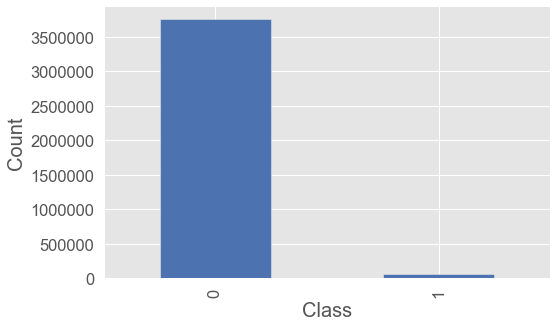

In [89]:
# Set figure font
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot bar
df['FATAL'].value_counts().plot(kind = 'bar', figsize = (8,5), color ='b')
plt.xlabel('Class', fontsize=20)
plt.ylabel('Count', fontsize=20)

 Let's look at the percentage of the class distribution

In [86]:
(df['FATAL'].value_counts()/df.shape[0])*100 

0    98.33906
1     1.66094
Name: FATAL, dtype: float64

- This is an extremely imbalanced class problem, where the class of interest (in this case fatal accidents) is extremely small compared to the other class 

- The majority (negative) class contains 98% of the class distribution, whereas the minority (positive) class is only 2% of the class distribution. 

In [87]:
# Drop rows with missing values
df = df.dropna()

In [88]:
# Save as csv dataframe
df.to_csv('../raw_data/clean_data.csv', index= False)